In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models
from astropy import units as u
from specutils.spectra import Spectrum1D, SpectralRegion
from specutils.fitting import fit_generic_continuum

In [2]:
np.random.seed(0)
x = np.linspace(0., 10., 200)
y = 3 * np.exp(-0.5 * (x - 6.3)**2 / 0.1**2)
y += np.random.normal(0., 0.2, x.shape)

In [3]:
y_continuum = 3.2 * np.exp(-0.5 * (x - 5.6)**2 / 4.8**2)
y += y_continuum

In [4]:
spectrum = Spectrum1D(flux=y*u.Jy, spectral_axis=x*u.um)

In [5]:
with warnings.catch_warnings():  # Ignore warnings
    warnings.simplefilter('ignore')
    g1_fit = fit_generic_continuum(spectrum)

In [6]:
y_continuum_fitted = g1_fit(x*u.um)

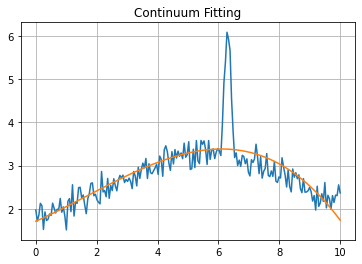

In [8]:
f, ax = plt.subplots()  
ax.plot(x, y)  
ax.plot(x, y_continuum_fitted)  
ax.set_title("Continuum Fitting")  
ax.grid(True)  

The normalized spectrum is simply the old spectrum devided by the fitted continuum, which returns a new object:

In [10]:
spec_normalized = spectrum / y_continuum_fitted

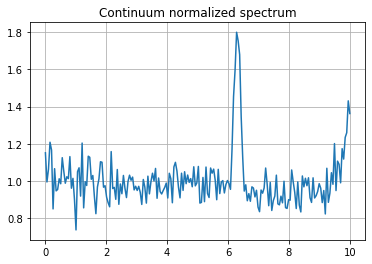

In [11]:
f, ax = plt.subplots()  
ax.plot(spec_normalized.spectral_axis, spec_normalized.flux)  
ax.set_title("Continuum normalized spectrum")  
ax.grid(True) 

The subtrated spectrum is simply the old spectrum devided by the fitted continuum, which returns a new object:

In [12]:
spec_sub = spectrum - y_continuum_fitted

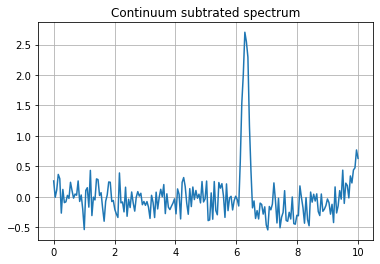

In [13]:
f, ax = plt.subplots()  
ax.plot(spec_sub.spectral_axis, spec_sub.flux)  
ax.set_title("Continuum subtrated spectrum")  
ax.grid(True) 